In [ ]:
import pandas as pd
import glob
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from scipy.stats import zscore


In [ ]:

# Define the path to the directory containing your CSV files
directory_path = './features_train/*.csv'  # Ensure this is the directory where your files are stored
test_directory_path = './features_test/*.csv'


In [ ]:
# Use glob to get a list of csv file paths
csv_files = glob.glob(directory_path)
test_csv_files = glob.glob(test_directory_path)


In [ ]:

# Initialize an empty DataFrame to combine all participant features
all_features_df = pd.DataFrame()
test_features_df = pd.DataFrame()

## Reading Train csv files

In [ ]:


# Loop through the file paths and read each file
for file_path in csv_files:
    participant_features = pd.read_csv(file_path, header=None)

    # Extract participant ID from the filename, assuming it's formatted as 'spk_x.csv'
    participant_id = int(file_path.split('_')[-1].split('.')[0])

    participant_features['participant_id'] = participant_id

    # Append to the combined DataFrame
    all_features_df = pd.concat([ all_features_df , participant_features], ignore_index=True)



## Reading Test CSV Files

In [ ]:


# Loop through the file paths and read each file
for file_path in test_csv_files:
    participant_features = pd.read_csv(file_path, header=None)

    # Extract participant ID from the filename, assuming it's formatted as 'spk_x.csv'
    participant_id = int(file_path.split('_')[-1].split('.')[0])

    participant_features['participant_id'] = participant_id

    # Append to the combined DataFrame
    test_features_df = pd.concat([ test_features_df , participant_features], ignore_index=True)



In [ ]:
features_list = [
    "F0semitoneFrom27.5Hz_sma3nz_amean",
    "F0semitoneFrom27.5Hz_sma3nz_stddevNorm",
    "F0semitoneFrom27.5Hz_sma3nz_percentile20.0",
    "F0semitoneFrom27.5Hz_sma3nz_percentile50.0",
    "F0semitoneFrom27.5Hz_sma3nz_percentile80.0",
    "F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2",
    "F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope",
    "F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope",
    "F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope",
    "F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope",
    "loudness_sma3_amean",
    "loudness_sma3_stddevNorm",
    "loudness_sma3_percentile20.0",
    "loudness_sma3_percentile50.0",
    "loudness_sma3_percentile80.0",
    "loudness_sma3_pctlrange0-2",
    "loudness_sma3_meanRisingSlope",
    "loudness_sma3_stddevRisingSlope",
    "loudness_sma3_meanFallingSlope",
    "loudness_sma3_stddevFallingSlope",
    "spectralFlux_sma3_amean",
    "spectralFlux_sma3_stddevNorm",
    "mfcc1_sma3_amean",
    "mfcc1_sma3_stddevNorm",
    "mfcc2_sma3_amean",
    "mfcc2_sma3_stddevNorm",
    "mfcc3_sma3_amean",
    "mfcc3_sma3_stddevNorm",
    "mfcc4_sma3_amean",
    "mfcc4_sma3_stddevNorm",
    "jitterLocal_sma3nz_amean",
    "jitterLocal_sma3nz_stddevNorm",
    "shimmerLocaldB_sma3nz_amean",
    "shimmerLocaldB_sma3nz_stddevNorm",
    "HNRdBACF_sma3nz_amean",
    "HNRdBACF_sma3nz_stddevNorm",
    "logRelF0-H1-H2_sma3nz_amean",
    "logRelF0-H1-H2_sma3nz_stddevNorm",
    "logRelF0-H1-A3_sma3nz_amean",
    "logRelF0-H1-A3_sma3nz_stddevNorm",
    "F1frequency_sma3nz_amean",
    "F1frequency_sma3nz_stddevNorm",
    "F1bandwidth_sma3nz_amean",
    "F1bandwidth_sma3nz_stddevNorm",
    "F1amplitudeLogRelF0_sma3nz_amean",
    "F1amplitudeLogRelF0_sma3nz_stddevNorm",
    "F2frequency_sma3nz_amean",
    "F2frequency_sma3nz_stddevNorm",
    "F2bandwidth_sma3nz_amean",
    "F2bandwidth_sma3nz_stddevNorm",
    "F2amplitudeLogRelF0_sma3nz_amean",
    "F2amplitudeLogRelF0_sma3nz_stddevNorm",
    "F3frequency_sma3nz_amean",
    "F3frequency_sma3nz_stddevNorm",
    "F3bandwidth_sma3nz_amean",
    "F3bandwidth_sma3nz_stddevNorm",
    "F3amplitudeLogRelF0_sma3nz_amean",
    "F3amplitudeLogRelF0_sma3nz_stddevNorm",
    "alphaRatioV_sma3nz_amean",
    "alphaRatioV_sma3nz_stddevNorm",
    "hammarbergIndexV_sma3nz_amean",
    "hammarbergIndexV_sma3nz_stddevNorm",
    "slopeV0-500_sma3nz_amean",
    "slopeV0-500_sma3nz_stddevNorm",
    "slopeV500-1500_sma3nz_amean",
    "slopeV500-1500_sma3nz_stddevNorm",
    "spectralFluxV_sma3nz_amean",
    "spectralFluxV_sma3nz_stddevNorm",
    "mfcc1V_sma3nz_amean",
    "mfcc1V_sma3nz_stddevNorm",
    "mfcc2V_sma3nz_amean",
    "mfcc2V_sma3nz_stddevNorm",
    "mfcc3V_sma3nz_amean",
    "mfcc3V_sma3nz_stddevNorm",
    "mfcc4V_sma3nz_amean",
    "mfcc4V_sma3nz_stddevNorm",
    "alphaRatioUV_sma3nz_amean",
    "hammarbergIndexUV_sma3nz_amean",
    "slopeUV0-500_sma3nz_amean",
    "slopeUV500-1500_sma3nz_amean",
    "spectralFluxUV_sma3nz_amean",
    "loudnessPeaksPerSec",
    "VoicedSegmentsPerSec",
    "MeanVoicedSegmentLengthSec",
    "StddevVoicedSegmentLengthSec",
    "MeanUnvoicedSegmentLength",
    "StddevUnvoicedSegmentLength",
    "equivalentSoundLevel_dBp",
    "participant_id"
]


In [ ]:
all_features_df.columns= features_list

In [ ]:
all_features_df.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,participant_id
0,37.110800,0.016898,36.521458,37.090477,37.525204,1.003746,24.374560,11.693271,-0.207191,9.438403,...,0.000534,0.033145,6.140351,4.629630,0.142,0.117541,0.070000,0.027386,-39.496513,303
1,33.466145,0.081636,30.579086,32.893642,35.499447,4.920361,12.148806,0.000000,16.623375,0.000000,...,0.005755,0.018813,2.142857,2.222222,0.210,0.072572,0.162500,0.084963,-40.960510,303
2,31.222300,0.035549,30.420216,30.726269,31.939356,1.519140,6.691987,0.000000,23.152794,0.000000,...,0.008003,0.017920,2.941176,1.587302,0.230,0.000000,0.185000,0.065000,-42.518540,303
3,34.281920,0.031365,32.879463,34.713913,35.204903,2.325439,3.409068,0.000000,10.839425,0.000000,...,0.004489,0.021129,3.947368,2.816901,0.180,0.000000,0.100000,0.024495,-44.036240,303
4,34.795260,0.018941,34.109280,34.899593,35.433464,1.324184,16.008287,14.265874,10.287021,6.374829,...,0.006402,0.018257,4.000000,2.040816,0.272,0.109435,0.163333,0.170945,-42.155136,303


In [ ]:
test_features_df.columns = features_list

In [ ]:
test_features_df.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,participant_id
0,32.160255,0.200581,23.145561,35.632530,36.815937,13.670376,-65.049820,0.000000,28.641510,0.000000,...,-0.018741,0.274747,0.840336,1.754386,0.145000,0.065000,0.266667,0.164384,-24.856180,305
1,28.780031,0.074786,27.129395,28.150295,31.058764,3.929369,52.741413,13.374495,3.220003,4.861248,...,-0.014919,0.389687,3.070175,3.139013,0.170000,0.140712,0.145000,0.123119,-20.882643,305
2,29.038708,0.144522,25.411283,25.819115,34.090847,8.679564,65.176770,0.000000,-13.047282,0.000000,...,-0.017801,0.239352,1.190476,2.531646,0.075000,0.015000,0.196667,0.110252,-21.540741,305
3,24.198637,0.077389,22.477812,24.032180,25.971500,3.493689,106.853410,211.200330,14.058883,9.024993,...,-0.016768,0.280889,2.503682,1.699926,0.166087,0.145086,0.385000,0.467377,-23.443264,305
4,23.637993,0.130217,18.551594,25.037369,26.020950,7.469356,40.880257,21.864357,4.867825,10.950583,...,-0.013799,0.129880,1.754386,2.409639,0.112500,0.078859,0.224000,0.308649,-31.355045,305


In [ ]:
labels_df = pd.read_csv("labels.csv")

In [ ]:
labels_df.columns = [col.lower().replace(" ", "_") for col in labels_df.columns]

In [ ]:
labels_df.head()

,participant_id,depression,gender
0,303.0,0,0
1,304.0,0,0
2,305.0,0,1
3,310.0,0,1
4,312.0,0,1


In [ ]:
temp = all_features_df.merge(labels_df, on = 'participant_id')
test_temp = test_features_df.merge(labels_df, on = 'participant_id')

In [ ]:
temp.shape,test_temp.shape

((13626, 91), (3280, 91))

In [ ]:
temp.to_csv('combined_participants_data.csv', index=False)
test_temp.to_csv('test_combined_participants_data.csv', index=False)


In [ ]:
columns_to_be_scaled = temp.drop(columns = ['participant_id', 'depression', 'gender']).columns
test_columns_to_be_scaled = test_temp.drop(columns = ['participant_id', 'depression', 'gender']).columns


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(temp[columns_to_be_scaled])
test_scaled_data = scaler.fit_transform(test_temp[test_columns_to_be_scaled])

In [ ]:
scaled_df = pd.DataFrame(scaled_data)
scaled_test_df = pd.DataFrame(test_scaled_data)

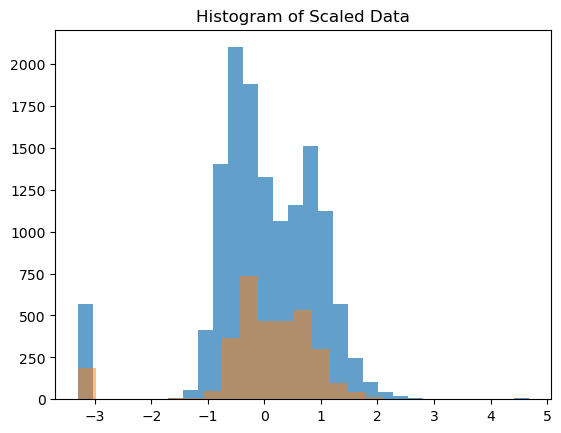

In [ ]:
plt.hist(scaled_df[0], bins=30, alpha=0.7)
plt.hist(scaled_test_df[0], bins = 25, alpha=0.5)
plt.title('Histogram of Scaled Data')
plt.show()

In [ ]:

# not_outliers_IQR.plot(kind='hist', bins = 30, edgecolor='black', alpha= 0.3, density=True)
# mean_value = not_outliers_IQR.mean()

# # Draw KDE using seaborn
# sns.kdeplot(data, color="blue", lw=2)

# # Draw a vertical line at the mean (or median)
# plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
# # plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2)  # For median


In [ ]:
# shapiro_test = stats.shapiro(not_outliers_IQR)
# print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")


In [ ]:
# import numpy as np

# squared_col_0 = np.sqrt(scaled_df[0])

In [ ]:
# squared_col_0.shape

In [ ]:

# squared_col_0.plot(kind='hist', bins = 30, edgecolor='black', alpha= 0.3,  density=True)
# mean_value = squared_col_0.mean()
# # Draw KDE using seaborn
# sns.kdeplot(squared_col_0, color="blue", lw=2)

# # Draw a vertical line at the mean (or median)
# plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
# # plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2)  # For median


In [ ]:
# shapiro_test = stats.shapiro(squared_col_0)
# print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")



In [ ]:
# plt.hist(squared_col_0, bins=30, alpha=0.3, edgecolor='gray', linewidth=1.2)
# mean_value = squared_col_0.mean()

# # Draw a vertical line at the mean (or median)
# plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
# # plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2)  # For median

# # Add a label for the line
# plt.text(mean_value, plt.ylim()[1]*0.95, 'Mean', horizontalalignment='right', color='red')
# # plt.text(median_value, plt.ylim()[1]*0.95, 'Median', horizontalalignment='right', color='red')  # For median



# plt.title('Histogram of Scaled Data')
# plt.show()

## Gender - female-1 male-0

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

# # Load your dataset
# data = temp
# # Fill missing values if necessary
# data.fillna(data.mean(), inplace=True)

# # Prepare feature matrix X and target vector y
# X = data.drop(['participant_id', 'depression', 'gender'], axis=1)
# y = data['depression']

# # Keep the participant_id and gender for later use
# participant_ids = data['participant_id']
# genders = data['gender']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# participants_train = participant_ids.loc[X_train.index]
# participants_test = participant_ids.loc[X_test.index]
# genders_test = genders.loc[X_test.index]

# # Initialize the classifier
# classifier = RandomForestClassifier(random_state=42)
# classifier.fit(X_train, y_train)

# # Predict on the test data
# y_pred = classifier.predict(X_test)

# # Aggregate the predictions to the participant level
# participants_results = pd.DataFrame({
#     'participant_id': participants_test,
#     'true_label': y_test,
#     'predicted_label': y_pred,
#     'gender': genders_test
# })
# participants_results_grouped = participants_results.groupby('participant_id').agg({
#     'true_label': 'max',  # Assumes that the 'true_label' is the same for all turns of a participant
#     'predicted_label': 'mean',  # Average prediction score per participant
#     'gender': 'first'  # Gender is the same for all turns of a participant
# })

# # Threshold the predictions at 0.5 for classification
# participants_results_grouped['final_prediction'] = (participants_results_grouped['predicted_label'] >= 0.5).astype(int)

# # Calculate the metrics
# accuracy_A = accuracy_score(participants_results_grouped['true_label'], participants_results_grouped['final_prediction'])
# balanced_accuracy_BA = balanced_accuracy_score(participants_results_grouped['true_label'], participants_results_grouped['final_prediction'])

# # Separate the data for female and male participants
# female_data = participants_results_grouped[participants_results_grouped['gender'] == 1]
# male_data = participants_results_grouped[participants_results_grouped['gender'] == 0]

# # Calculate the metrics for female and male participants
# accuracy_female = accuracy_score(female_data['true_label'], female_data['final_prediction'])
# balanced_accuracy_female = balanced_accuracy_score(female_data['true_label'], female_data['final_prediction'])

# accuracy_male = accuracy_score(male_data['true_label'], male_data['final_prediction'])
# balanced_accuracy_male = balanced_accuracy_score(male_data['true_label'], male_data['final_prediction'])

# # Calculate Equality of Opportunity (EO)
# conf_matrix_female = confusion_matrix(female_data['true_label'], female_data['final_prediction'])
# conf_matrix_male = confusion_matrix(male_data['true_label'], male_data['final_prediction'])
# tpr_female = conf_matrix_female[1, 1] / (conf_matrix_female[1, 1] + conf_matrix_female[1, 0])
# tpr_male = conf_matrix_male[1, 1] / (conf_matrix_male[1, 1] + conf_matrix_male[1, 0])
# EO = 1 - abs(tpr_male - tpr_female)

# # Print the metrics
# print(f'Overall Accuracy (A): {accuracy_A}')
# print(f'Overall Balanced Accuracy (BA): {balanced_accuracy_BA}')
# print(f'Female Accuracy: {accuracy_female}')
# print(f'Female Balanced Accuracy: {balanced_accuracy_female}')
# print(f'Male Accuracy: {accuracy_male}')
# print(f'Male Balanced Accuracy: {balanced_accuracy_male}')
# print(f'Equality of Opportunity (EO): {EO}')


## Removing the duplicates from train data

In [ ]:
temp.shape

(13626, 91)

In [ ]:
temp = temp.dropna()
temp.shape

(13625, 91)

In [ ]:

# Checking for duplicate rows
duplicates = temp.duplicated().sum()
duplicates
# Handling duplicate rows by removing them
data_no_duplicates = temp.drop_duplicates()
data_no_duplicates.head()
data_no_duplicates.shape

(13625, 91)

## Removing the duplicates from test data

In [ ]:
test_temp.shape

(3280, 91)

In [ ]:
test_temp = test_temp.dropna()
test_temp.shape

(3280, 91)

In [ ]:

# Handling duplicate rows by removing them
test_data_no_duplicates = test_temp.drop_duplicates()
test_data_no_duplicates.shape

(3280, 91)

In [ ]:
test_data_no_duplicates.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,participant_id,depression,gender
0,32.160255,0.200581,23.145561,35.632530,36.815937,13.670376,-65.049820,0.000000,28.641510,0.000000,...,0.840336,1.754386,0.145000,0.065000,0.266667,0.164384,-24.856180,305,0,1
1,28.780031,0.074786,27.129395,28.150295,31.058764,3.929369,52.741413,13.374495,3.220003,4.861248,...,3.070175,3.139013,0.170000,0.140712,0.145000,0.123119,-20.882643,305,0,1
2,29.038708,0.144522,25.411283,25.819115,34.090847,8.679564,65.176770,0.000000,-13.047282,0.000000,...,1.190476,2.531646,0.075000,0.015000,0.196667,0.110252,-21.540741,305,0,1
3,24.198637,0.077389,22.477812,24.032180,25.971500,3.493689,106.853410,211.200330,14.058883,9.024993,...,2.503682,1.699926,0.166087,0.145086,0.385000,0.467377,-23.443264,305,0,1
4,23.637993,0.130217,18.551594,25.037369,26.020950,7.469356,40.880257,21.864357,4.867825,10.950583,...,1.754386,2.409639,0.112500,0.078859,0.224000,0.308649,-31.355045,305,0,1


## Outlier Handling

In [ ]:

# Handling outliers by computing Z-scores and filtering out extreme values
from scipy.stats import zscore

# Calculate Z-scores of all columns
z_scores = zscore(temp.select_dtypes(include=[float]))

# Filter the data: Remove rows where any column has a Z-score greater than 3 or less than -3
data_cleaned = temp[(abs(z_scores) < 3).all(axis=1)]

data_cleaned.shape


(9185, 91)

In [ ]:

# Handling outliers by computing Z-scores and filtering out extreme values
from scipy.stats import zscore

# Calculate Z-scores of all columns
test_z_scores = zscore(test_temp.select_dtypes(include=[float]))

# Filter the data: Remove rows where any column has a Z-score greater than 3 or less than -3
test_data_cleaned = test_temp[(abs(test_z_scores) < 3).all(axis=1)]

test_data_cleaned.shape


(2115, 91)

## Depression Classification
* 1- male
* 0- female

In [ ]:

data = data_cleaned

# Prepare feature matrix X and target vector y
X = data.drop(['participant_id', 'depression', 'gender'], axis=1)
y = data['depression']

participant_ids = data['participant_id']
genders = data['gender']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
participants_train = participant_ids[X_train.index]
participants_test = participant_ids[X_test.index]
genders_test = genders[X_test.index]

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test data using predict_proba for more granular control
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Aggregate the predictions to the participant level
participants_results = pd.DataFrame({
    'participant_id': participants_test,
    'true_label': y_test,
    'predicted_prob': y_pred_prob,
    'gender': genders_test
})
participants_results_grouped = participants_results.groupby('participant_id').agg({
    'true_label': 'first',  # Assumes that the 'true_label' is the same for all turns of a participant
    'predicted_prob': 'mean',  # Average prediction probability per participant
    'gender': 'first'  # Gender is the same for all turns of a participant
})

# Threshold the predictions at 0.5 for classification
participants_results_grouped['final_prediction'] = (participants_results_grouped['predicted_prob'] >= 0.5).astype(int)

# Calculate the metrics
accuracy_A = accuracy_score(participants_results_grouped['true_label'], participants_results_grouped['final_prediction'])
balanced_accuracy_BA = balanced_accuracy_score(participants_results_grouped['true_label'], participants_results_grouped['final_prediction'])

# Separate the data for female and male participants
female_data = participants_results_grouped[participants_results_grouped['gender'] == 0]
male_data = participants_results_grouped[participants_results_grouped['gender'] == 1]

# Calculate the metrics for female and male participants
accuracy_female = accuracy_score(female_data['true_label'], female_data['final_prediction'])
balanced_accuracy_female = balanced_accuracy_score(female_data['true_label'], female_data['final_prediction'])
accuracy_male = accuracy_score(male_data['true_label'], male_data['final_prediction'])
balanced_accuracy_male = balanced_accuracy_score(male_data['true_label'], male_data['final_prediction'])

# Calculate Equality of Opportunity (EO)
conf_matrix_female = confusion_matrix(female_data['true_label'], female_data['final_prediction'])
conf_matrix_male = confusion_matrix(male_data['true_label'], male_data['final_prediction'])
tpr_female = conf_matrix_female[1, 1] / (conf_matrix_female[1, :].sum() if conf_matrix_female[1, :].sum() != 0 else 1)
tpr_male = conf_matrix_male[1, 1] / (conf_matrix_male[1, :].sum() if conf_matrix_male[1, :].sum() != 0 else 1)
EO = 1 - abs(tpr_male - tpr_female)

# Print the metrics
print(f'Overall Accuracy (A): {accuracy_A}')
print(f'Overall Balanced Accuracy (BA): {balanced_accuracy_BA}')
print(f'Female Accuracy: {accuracy_female}')
print(f'Female Balanced Accuracy: {balanced_accuracy_female}')
print(f'Male Accuracy: {accuracy_male}')
print(f'Male Balanced Accuracy: {balanced_accuracy_male}')
print(f'Equality of Opportunity (EO): {EO}')


Overall Accuracy (A): 0.8620689655172413
Overall Balanced Accuracy (BA): 0.75
Female Accuracy: 0.8888888888888888
Female Balanced Accuracy: 0.8333333333333333
Male Accuracy: 0.8431372549019608
Male Balanced Accuracy: 0.6666666666666666
Equality of Opportunity (EO): 0.6666666666666667


## Using test data for predictions

In [ ]:

test_data = test_data_cleaned

# Prepare the feature matrix X_test and vectors for participant_id and gender
X_test = test_data.drop(['participant_id', 'depression', 'gender'], axis=1)
y_test = test_data['depression']
participants_test = test_data['participant_id']
genders_test = test_data['gender']

# Predict on the test data using predict_proba for more granular control
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Aggregate the predictions to the participant level
participants_results = pd.DataFrame({
    'participant_id': participants_test,
    'true_label': y_test,
    'predicted_prob': y_pred_prob,
    'gender': genders_test
})
participants_results_grouped = participants_results.groupby('participant_id').agg({
    'true_label': 'first',  # Assumes that the 'true_label' is the same for all instances of a participant
    'predicted_prob': 'mean',  # Average prediction probability per participant
    'gender': 'first'  # Gender is the same for all instances of a participant
})

# Threshold the predictions at 0.5 for classification
participants_results_grouped['final_prediction'] = (participants_results_grouped['predicted_prob'] >= 0.5).astype(int)

# Calculate the metrics
accuracy_A = accuracy_score(participants_results_grouped['true_label'], participants_results_grouped['final_prediction'])
balanced_accuracy_BA = balanced_accuracy_score(participants_results_grouped['true_label'], participants_results_grouped['final_prediction'])

# Separate the data for female and male participants
female_data = participants_results_grouped[participants_results_grouped['gender'] == 0]
male_data = participants_results_grouped[participants_results_grouped['gender'] == 1]

# Calculate the metrics for female and male participants
accuracy_female = accuracy_score(female_data['true_label'], female_data['final_prediction'])
balanced_accuracy_female = balanced_accuracy_score(female_data['true_label'], female_data['final_prediction'])
accuracy_male = accuracy_score(male_data['true_label'], male_data['final_prediction'])
balanced_accuracy_male = balanced_accuracy_score(male_data['true_label'], male_data['final_prediction'])

# Calculate Equality of Opportunity (EO)
conf_matrix_female = confusion_matrix(female_data['true_label'], female_data['final_prediction'])
conf_matrix_male = confusion_matrix(male_data['true_label'], male_data['final_prediction'])
tpr_female = conf_matrix_female[1, 1] / (conf_matrix_female[1, :].sum() if conf_matrix_female[1, :].sum() != 0 else 1)
tpr_male = conf_matrix_male[1, 1] / (conf_matrix_male[1, :].sum() if conf_matrix_male[1, :].sum() != 0 else 1)
EO = 1 - abs(tpr_male - tpr_female)

# Print the metrics
print(f'Overall Accuracy (A): {accuracy_A}')
print(f'Overall Balanced Accuracy (BA): {balanced_accuracy_BA}')
print(f'Female Accuracy: {accuracy_female}')
print(f'Female Balanced Accuracy: {balanced_accuracy_female}')
print(f'Male Accuracy: {accuracy_male}')
print(f'Male Balanced Accuracy: {balanced_accuracy_male}')
print(f'Equality of Opportunity (EO): {EO}')


Overall Accuracy (A): 0.7
Overall Balanced Accuracy (BA): 0.5
Female Accuracy: 0.375
Female Balanced Accuracy: 0.5
Male Accuracy: 0.9166666666666666
Male Balanced Accuracy: 0.5
Equality of Opportunity (EO): 1.0


## Gender Classification

In [ ]:
# Prepare data for gender classification

X_gender = data_cleaned.drop(columns=['depression', 'gender', 'participant_id'])
y_gender = data_cleaned['gender']

# Splitting the data for gender classification
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(
    X_gender, y_gender, test_size=0.2, random_state=42, stratify=y_gender)

# Keeping participant ID for test set to aggregate results later
participants_test_gender = data_cleaned.loc[X_test_gender.index, 'participant_id']

# Training a Random Forest Classifier for gender classification
gender_classifier = RandomForestClassifier(random_state=42)
gender_classifier.fit(X_train_gender, y_train_gender)

# Predicting gender on the test data
y_pred_gender = gender_classifier.predict_proba(X_test_gender)[:, 1]

# Creating DataFrame to aggregate predictions to the participant level
participants_gender_results = pd.DataFrame({
    'participant_id': participants_test_gender,
    'true_label': y_test_gender,
    'predicted_prob': y_pred_gender
})

# Grouping by participant_id and aggregating predictions
participants_gender_results_grouped = participants_gender_results.groupby('participant_id').agg({
    'true_label': 'first',  # Assumes the 'true_label' is the same for all turns of a participant
    'predicted_prob': 'mean'  # Average prediction probability per participant
})

# Thresholding the average predictions to make a final gender prediction
participants_gender_results_grouped['final_prediction'] = (participants_gender_results_grouped['predicted_prob'] >= 0.5).astype(int)

# Calculating the accuracy and balanced accuracy at the participant level
accuracy_A_gender = accuracy_score(participants_gender_results_grouped['true_label'], participants_gender_results_grouped['final_prediction'])
balanced_accuracy_BA_gender = balanced_accuracy_score(participants_gender_results_grouped['true_label'], participants_gender_results_grouped['final_prediction'])

accuracy_A_gender, balanced_accuracy_BA_gender


(1.0, 1.0)

## Using test data for predictions

In [ ]:

X_test_gender = test_data.drop(columns=['depression', 'gender', 'participant_id'])
y_test_gender = test_data['gender']
participants_test_gender = test_data['participant_id']


# Predicting gender on the test data using predict_proba for more granular control
y_pred_gender = gender_classifier.predict_proba(X_test_gender)[:, 1]

# Creating DataFrame to aggregate predictions to the participant level
participants_gender_results = pd.DataFrame({
    'participant_id': participants_test_gender,
    'true_label': y_test_gender,
    'predicted_prob': y_pred_gender
})

# Grouping by participant_id and aggregating predictions
participants_gender_results_grouped = participants_gender_results.groupby('participant_id').agg({
    'true_label': 'first',  # Assumes the 'true_label' is the same for all instances of a participant
    'predicted_prob': 'mean'  # Average prediction probability per participant
})

# Thresholding the average predictions to make a final gender prediction
participants_gender_results_grouped['final_prediction'] = (participants_gender_results_grouped['predicted_prob'] >= 0.5).astype(int)

# Calculating the accuracy and balanced accuracy at the participant level
accuracy_A_gender = accuracy_score(participants_gender_results_grouped['true_label'], participants_gender_results_grouped['final_prediction'])
balanced_accuracy_BA_gender = balanced_accuracy_score(participants_gender_results_grouped['true_label'], participants_gender_results_grouped['final_prediction'])

# Print the metrics
print(f'Accuracy (A) for Gender Classification: {accuracy_A_gender}')
print(f'Balanced Accuracy (BA) for Gender Classification: {balanced_accuracy_BA_gender}')


Accuracy (A) for Gender Classification: 1.0
Balanced Accuracy (BA) for Gender Classification: 1.0


## b->  most informative features for depression

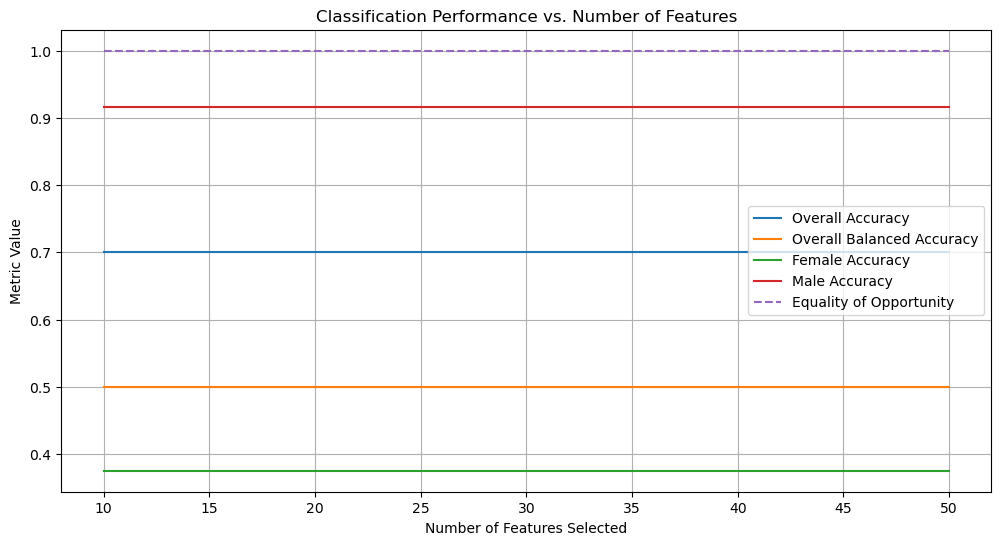

In [ ]:

# Define the range of 'n' features to be selected
n_features_list = list(range(10, 51, 5))

# Initialize lists to store metrics for plotting
overall_accuracies = []
overall_balanced_accuracies = []
female_accuracies = []
male_accuracies = []
EOs = []

# Loop over desired numbers of features
for n_features in n_features_list:
    # Select top 'n_features' features based on ANOVA F-test
    selector = SelectKBest(f_classif, k=n_features)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Train the classifier using the selected features
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train_selected, y_train)

    # Predict on the test data using the selected features
    y_pred = classifier.predict(X_test_selected)

    # Aggregate predictions to the participant level
    participants_results = pd.DataFrame({
        'participant_id': participants_test,
        'true_label': y_test,
        'predicted_label': y_pred,
        'gender': genders_test
    })
    participants_results_grouped = participants_results.groupby('participant_id').agg({
        'true_label': 'max',
        'predicted_label': 'mean',
        'gender': 'first'
    })
    participants_results_grouped['final_prediction'] = (participants_results_grouped['predicted_label'] >= 0.5).astype(int)

    # Compute the metrics at the participant level
    accuracy_A = accuracy_score(participants_results_grouped['true_label'], participants_results_grouped['final_prediction'])
    balanced_accuracy_BA = balanced_accuracy_score(participants_results_grouped['true_label'], participants_results_grouped['final_prediction'])

    # Store the overall metrics
    overall_accuracies.append(accuracy_A)
    overall_balanced_accuracies.append(balanced_accuracy_BA)

    # Compute and store gender-specific metrics
    female_data = participants_results_grouped[participants_results_grouped['gender'] == 0]
    male_data = participants_results_grouped[participants_results_grouped['gender'] == 1]
    female_accuracies.append(accuracy_score(female_data['true_label'], female_data['final_prediction']))
    male_accuracies.append(accuracy_score(male_data['true_label'], male_data['final_prediction']))

    # Compute EO
    cm_female = confusion_matrix(female_data['true_label'], female_data['final_prediction'])
    cm_male = confusion_matrix(male_data['true_label'], male_data['final_prediction'])
    tpr_female = cm_female[1, 1] / (cm_female[1, 1] + cm_female[1, 0])
    tpr_male = cm_male[1, 1] / (cm_male[1, 1] + cm_male[1, 0])
    EO = 1 - abs(tpr_female - tpr_male)
    EOs.append(EO)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(n_features_list, overall_accuracies, label='Overall Accuracy')
plt.plot(n_features_list, overall_balanced_accuracies, label='Overall Balanced Accuracy')
plt.plot(n_features_list, female_accuracies, label='Female Accuracy')
plt.plot(n_features_list, male_accuracies, label='Male Accuracy')
plt.plot(n_features_list, EOs, label='Equality of Opportunity', linestyle='--')

plt.xlabel('Number of Features Selected')
plt.ylabel('Metric Value')
plt.title('Classification Performance vs. Number of Features')
plt.legend(loc='best')
plt.grid(True)
plt.show()


## c--> Finding the most informative features for gender.

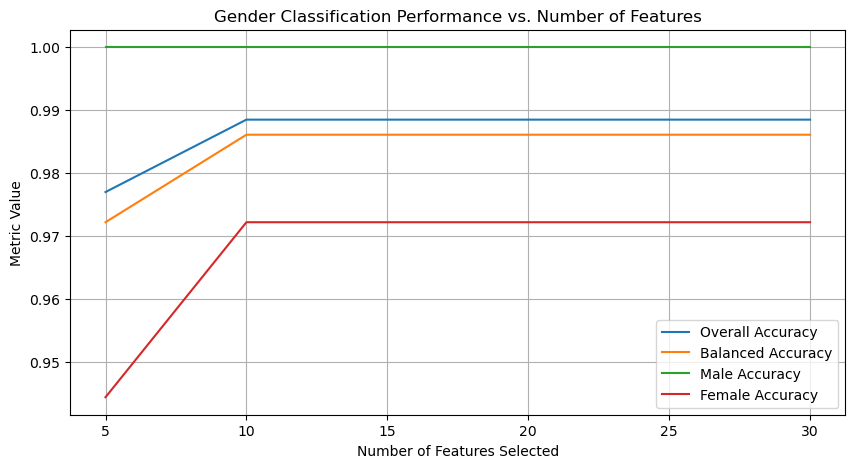

The 20 features most indicative of gender:
['F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'mfcc4_sma3_amean', 'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean', 'F1frequency_sma3nz_amean', 'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean', 'F2frequency_sma3nz_amean', 'F2frequency_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean', 'F3frequency_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean', 'mfcc1V_sma3nz_amean', 'mfcc3V_sma3nz_amean', 'mfcc4V_sma3nz_amean', 'slopeUV0-500_sma3nz_amean']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


data = data_cleaned
X = data.drop(['gender', 'participant_id'], axis=1)
y_gender = data['gender']
participants = data['participant_id']

# Split data into training and test sets, ensuring participants are also tracked
X_train, X_test, y_train_gender, y_test_gender, participants_train, participants_test = train_test_split(
    X, y_gender, participants, test_size=0.2, random_state=42, stratify=y_gender)

# Define range of 'm' features
m_features_list = list(range(5, 31, 5))

# Initialize lists to store metrics for plotting
accuracies = []
balanced_accuracies = []
male_accuracies = []
female_accuracies = []
EOs = []

for m_features in m_features_list:
    selector = SelectKBest(f_classif, k=m_features)
    X_train_selected = selector.fit_transform(X_train, y_train_gender)
    X_test_selected = selector.transform(X_test)

    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train_selected, y_train_gender)
    y_pred_gender = classifier.predict(X_test_selected)

    # Create DataFrame
    participants_gender_results = pd.DataFrame({
        'participant_id': participants_test.reset_index(drop=True),  # Reset index if necessary
        'true_gender_label': y_test_gender.reset_index(drop=True),
        'predicted_gender_label': y_pred_gender,
        'gender': y_test_gender.reset_index(drop=True)  # Include actual gender labels for EO calculation
    })

    # Aggregate predictions at the participant level
    participants_gender_grouped = participants_gender_results.groupby('participant_id').agg({
        'true_gender_label': 'max',  # Assuming gender is consistent within participants
        'predicted_gender_label': 'mean',  # Average prediction score per participant
        'gender': 'first'  # Gender should be consistent within grouped data
    })
    participants_gender_grouped['final_prediction'] = (participants_gender_grouped['predicted_gender_label'] >= 0.5).astype(int)

    # Compute metrics
    accuracy = accuracy_score(participants_gender_grouped['true_gender_label'], participants_gender_grouped['final_prediction'])
    balanced_accuracy = balanced_accuracy_score(participants_gender_grouped['true_gender_label'], participants_gender_grouped['final_prediction'])
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_accuracy)

    # Compute gender-specific accuracies
    male_data = participants_gender_grouped[participants_gender_grouped['gender'] == 1]  # Assuming 1 is male
    female_data = participants_gender_grouped[participants_gender_grouped['gender'] == 0]  # Assuming 0 is female
    male_accuracy = accuracy_score(male_data['true_gender_label'], male_data['final_prediction'])
    female_accuracy = accuracy_score(female_data['true_gender_label'], female_data['final_prediction'])
    male_accuracies.append(male_accuracy)
    female_accuracies.append(female_accuracy)

    # Compute Equality of Opportunity (EO)
    cm_male = confusion_matrix(male_data['true_gender_label'], male_data['final_prediction'])
    cm_female = confusion_matrix(female_data['true_gender_label'], female_data['final_prediction'])

        # Compute Equality of Opportunity (EO)
    if len(cm_male) > 1:
        tpr_male = cm_male[1, 1] / cm_male[1, :].sum() if cm_male[1, :].sum() else 0
    else:
        tpr_male = 0  # Assuming no positive predictions if the second row is missing

    if len(cm_female) > 1:
        tpr_female = cm_female[1, 1] / cm_female[1, :].sum() if cm_female[1, :].sum() else 0
    else:
        tpr_female = 0  # Assuming no positive predictions if the second row is missing

    EO = 1 - abs(tpr_male - tpr_female)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(m_features_list, accuracies, label='Overall Accuracy')
plt.plot(m_features_list, balanced_accuracies, label='Balanced Accuracy')
plt.plot(m_features_list, male_accuracies, label='Male Accuracy')
plt.plot(m_features_list, female_accuracies, label='Female Accuracy')
# plt.plot(m_features_list, EOs, label='Equality of Opportunity', linestyle='--')
plt.xlabel('Number of Features Selected')
plt.ylabel('Metric Value')
plt.title('Gender Classification Performance vs. Number of Features')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Reporting the 20 most indicative features of gender
selector = SelectKBest(f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train_gender)
selected_features_indices = selector.get_support(indices=True)
selected_features = [X_train.columns[i] for i in selected_features_indices]

print("The 20 features most indicative of gender:")
print(selected_features)


In [ ]:
# Compute the correlation matrix
corr_matrix = X_train.corrwith(y_train_gender).abs()

In [ ]:
# Select the top 20 most correlated features
selected_top_features = corr_matrix.sort_values(ascending=False).head(20).index.tolist()
print("Top 20 features most indicative of gender based on correlation:")
print(selected_top_features)

Top 20 features most indicative of gender based on correlation:
['F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'HNRdBACF_sma3nz_amean', 'slopeV0-500_sma3nz_amean', 'mfcc4V_sma3nz_amean', 'F2frequency_sma3nz_amean', 'mfcc4_sma3_amean', 'F1frequency_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean', 'jitterLocal_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean', 'F1bandwidth_sma3nz_amean', 'F2frequency_sma3nz_stddevNorm', 'F3frequency_sma3nz_stddevNorm', 'slopeUV0-500_sma3nz_amean', 'shimmerLocaldB_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean', 'mfcc1V_sma3nz_amean']


Accuracy: 0.9629831246597713
Balanced Accuracy: 0.9606974753958066


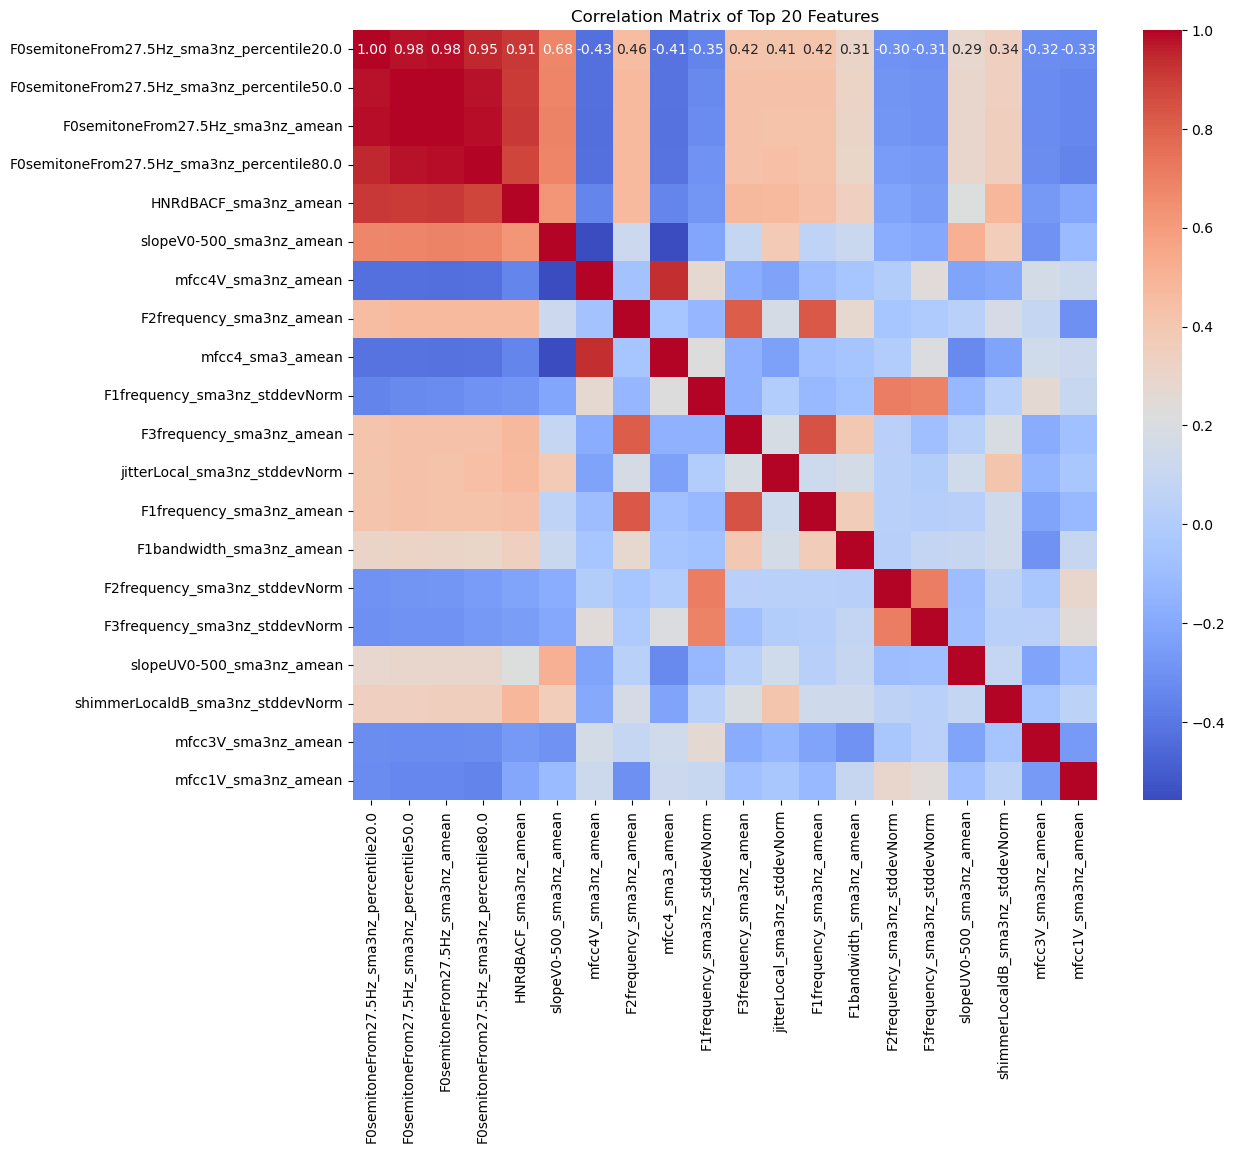

In [ ]:
# Training a RandomForest using only the top 20 correlated features
X_train_top_features = X_train[selected_top_features]
X_test_top_features = X_test[selected_top_features]

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_top_features, y_train_gender)
y_pred_gender = classifier.predict(X_test_top_features)

# Calculate metrics
accuracy = accuracy_score(y_test_gender, y_pred_gender)
balanced_accuracy = balanced_accuracy_score(y_test_gender, y_pred_gender)

print(f'Accuracy: {accuracy}')
print(f'Balanced Accuracy: {balanced_accuracy}')

plt.figure(figsize=(12, 10))
sns.heatmap(X_train[selected_top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Top 20 Features')
plt.show()

## Using test data to check the metrics

In [ ]:
test_data_cleaned.shape, test_data.shape

((2115, 91), (2115, 91))

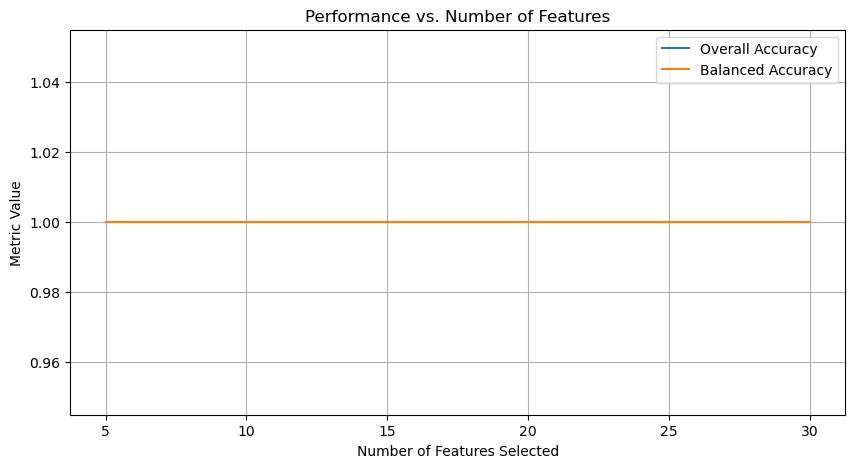

In [ ]:

# Load your dataset
data = test_data
X = data.drop(['gender', 'participant_id'], axis=1)
y_gender = data['gender']
participants = data['participant_id']

# Compute the correlation matrix with the target
correlation_matrix = X.corrwith(y_gender).abs()
sorted_features = correlation_matrix.sort_values(ascending=False).index

# Define range of 'm' features
m_features_list = list(range(5, 31, 5))

# Initialize lists to store metrics for plotting
accuracies = []
balanced_accuracies = []
intervals = []

for m_features in m_features_list:
    # Select the top 'm_features' based on correlation
    top_features = sorted_features[:m_features]
    X_selected = X[top_features]

    # Split data into training and test sets
    X_train, X_test, y_train_gender, y_test_gender, participants_train, participants_test = train_test_split(
        X_selected, y_gender, participants, test_size=0.2, random_state=42, stratify=y_gender)

    # Training the classifier
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train_gender)
    y_pred_gender = classifier.predict(X_test)

    # Aggregating predictions at the participant level
    participants_gender_results = pd.DataFrame({
        'participant_id': participants_test,
        'true_gender_label': y_test_gender,
        'predicted_gender_label': y_pred_gender,
        'gender': y_test_gender  # Include actual gender labels for EO calculation
    })

    # Group results by participant
    participants_gender_grouped = participants_gender_results.groupby('participant_id').agg({
        'true_gender_label': 'max',
        'predicted_gender_label': 'mean',
        'gender': 'first'
    })
    participants_gender_grouped['final_prediction'] = (participants_gender_grouped['predicted_gender_label'] >= 0.5).astype(int)

    # Compute metrics
    accuracy = accuracy_score(participants_gender_grouped['true_gender_label'], participants_gender_grouped['final_prediction'])
    balanced_accuracy = balanced_accuracy_score(participants_gender_grouped['true_gender_label'], participants_gender_grouped['final_prediction'])

    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_accuracy)
    intervals.append(m_features)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(intervals, accuracies, label='Overall Accuracy')
plt.plot(intervals, balanced_accuracies, label='Balanced Accuracy')
plt.xlabel('Number of Features Selected')
plt.ylabel('Metric Value')
plt.title('Performance vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
accuracies

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
balanced_accuracies

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
selected_top_features

['F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'HNRdBACF_sma3nz_amean',
 'slopeV0-500_sma3nz_amean',
 'mfcc4V_sma3nz_amean',
 'F2frequency_sma3nz_amean',
 'mfcc4_sma3_amean',
 'F1frequency_sma3nz_stddevNorm',
 'F3frequency_sma3nz_amean',
 'jitterLocal_sma3nz_stddevNorm',
 'F1frequency_sma3nz_amean',
 'F1bandwidth_sma3nz_amean',
 'F2frequency_sma3nz_stddevNorm',
 'F3frequency_sma3nz_stddevNorm',
 'slopeUV0-500_sma3nz_amean',
 'shimmerLocaldB_sma3nz_stddevNorm',
 'mfcc3V_sma3nz_amean',
 'mfcc1V_sma3nz_amean']

# Mitigating bias via removing gender-dependent features.

In [ ]:
## Training the model with cleaned data

In [ ]:
data = data_cleaned
data = data.drop(columns=selected_top_features)

In [ ]:
# Load your dataset (assuming it's already loaded as 'data')
X_revised = data.drop(['gender', 'depression', 'participant_id'], axis=1)
y_depression = data['depression']
y_gender = data['gender']
participants = data['participant_id']

In [ ]:
# Split the revised dataset for depression classification
X_train, X_test, y_train, y_test, participants_train, participants_test = train_test_split(
    X_revised, y_depression, participants, test_size=0.2, random_state=42, stratify=y_depression)
# Training the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [ ]:
# Aggregating predictions at the participant level
results_df = pd.DataFrame({
    'participant_id': participants_test,
    'true_label': y_test,
    'predicted_label': y_pred,
    'gender': data.loc[participants_test.index, 'gender']
})

# Group results by participant
aggregated_results = results_df.groupby('participant_id').agg({
    'true_label': 'first',
    'predicted_label': lambda x: (x.mean() >= 0.5).astype(int),
    'gender': 'first'
})

In [ ]:
# Calculate overall metrics
accuracy_A = accuracy_score(aggregated_results['true_label'], aggregated_results['predicted_label'])
balanced_accuracy_BA = balanced_accuracy_score(aggregated_results['true_label'], aggregated_results['predicted_label'])

# Separating data for EO calculation
male_data = aggregated_results[aggregated_results['gender'] == 1]
female_data = aggregated_results[aggregated_results['gender'] == 0]



In [ ]:
# Calculate the metrics for female and male participants
accuracy_female = accuracy_score(female_data['true_label'], female_data['predicted_label'])
balanced_accuracy_female = balanced_accuracy_score(female_data['true_label'], female_data['predicted_label'])
accuracy_male = accuracy_score(male_data['true_label'], male_data['predicted_label'])
balanced_accuracy_male = balanced_accuracy_score(male_data['true_label'], male_data['predicted_label'])



# Function to safely calculate TPR from a confusion matrix
def calculate_tpr(cm, pos_label=1):
    if cm.shape == (2, 2):  # Both classes (0 and 1) are present
        return cm[pos_label, pos_label] / cm[pos_label, :].sum() if cm[pos_label, :].sum() else 0
    elif cm.size == 1:  # Only one class is present in the predictions
        if cm[0, 0] == pos_label:  # The existing class is the positive class
            return 1  # All predictions are true positives (though trivial and not useful)
        else:
            return 0  # No true positives
    return 0  # Default case to handle empty matrices or other unexpected cases

cm_male = confusion_matrix(male_data['true_label'], male_data['predicted_label'], labels=[0, 1])
cm_female = confusion_matrix(female_data['true_label'], female_data['predicted_label'], labels=[0, 1])

# Using the safe calculation function for TPR
tpr_male = calculate_tpr(cm_male, pos_label=1)
tpr_female = calculate_tpr(cm_female, pos_label=1)
EO = 1 - abs(tpr_male - tpr_female)

# Print the metrics
print(f'Overall Accuracy (A): {accuracy_A}')
print(f'Overall Balanced Accuracy (BA): {balanced_accuracy_BA}')
print(f'Female Accuracy: {accuracy_female}')
print(f'Female Balanced Accuracy: {balanced_accuracy_female}')
print(f'Male Accuracy: {accuracy_male}')
print(f'Male Balanced Accuracy: {balanced_accuracy_male}')
print(f'Equality of Opportunity (EO): {EO}')

Overall Accuracy (A): 0.8045977011494253
Overall Balanced Accuracy (BA): 0.6458333333333334
Female Accuracy: 0.8055555555555556
Female Balanced Accuracy: 0.7083333333333334
Male Accuracy: 0.803921568627451
Male Balanced Accuracy: 0.5833333333333334
Equality of Opportunity (EO): 0.75


## Validation-set Results:

| Metric                     | Value      |
|----------------------------|------------|
| Overall Accuracy (A)       | 0.8046     |
| Overall Balanced Accuracy  | 0.6458     |
| Female Accuracy            | 0.8056     |
| Female Balanced Accuracy   | 0.7083     |
| Male Accuracy              | 0.8039     |
| Male Balanced Accuracy     | 0.5833     |
| Equality of Opportunity (EO)| 0.75      |
: 0.75


## With test set

In [ ]:

test_data = test_data_cleaned
# Remove these features from the dataset
test_data.shape

(2115, 91)

In [ ]:
 test_data = test_data.drop(columns=selected_top_features)

In [ ]:
# Prepare the feature matrix X_test and vectors for participant_id and gender
X_test = test_data.drop(['participant_id', 'depression', 'gender'], axis=1)
y_test = test_data['depression']
participants_test = test_data['participant_id']
genders_test = test_data['gender']


In [ ]:

# Predict on the test data using predict_proba for more granular control
y_pred_prob = classifier.predict_proba(X_test)[:, 1]


In [ ]:

# Aggregate the predictions to the participant level
participants_results = pd.DataFrame({
    'participant_id': participants_test,
    'true_label': y_test,
    'predicted_prob': y_pred_prob,
    'gender': genders_test
})
participants_results_grouped = participants_results.groupby('participant_id').agg({
    'true_label': 'first',  # Assumes that the 'true_label' is the same for all instances of a participant
    'predicted_prob': 'mean',  # Average prediction probability per participant
    'gender': 'first'  # Gender is the same for all instances of a participant
})


In [ ]:

# Threshold the predictions at 0.5 for classification
participants_results_grouped['final_prediction'] = (participants_results_grouped['predicted_prob'] >= 0.5).astype(int)

# Calculate the metrics
accuracy_A = accuracy_score(participants_results_grouped['true_label'], participants_results_grouped['final_prediction'])
balanced_accuracy_BA = balanced_accuracy_score(participants_results_grouped['true_label'], participants_results_grouped['final_prediction'])

# Separate the data for female and male participants
female_data = participants_results_grouped[participants_results_grouped['gender'] == 0]
male_data = participants_results_grouped[participants_results_grouped['gender'] == 1]

# Calculate the metrics for female and male participants
accuracy_female = accuracy_score(female_data['true_label'], female_data['final_prediction'])
balanced_accuracy_female = balanced_accuracy_score(female_data['true_label'], female_data['final_prediction'])
accuracy_male = accuracy_score(male_data['true_label'], male_data['final_prediction'])
balanced_accuracy_male = balanced_accuracy_score(male_data['true_label'], male_data['final_prediction'])

# Calculate Equality of Opportunity (EO)
conf_matrix_female = confusion_matrix(female_data['true_label'], female_data['final_prediction'])
conf_matrix_male = confusion_matrix(male_data['true_label'], male_data['final_prediction'])
tpr_female = conf_matrix_female[1, 1] / (conf_matrix_female[1, :].sum() if conf_matrix_female[1, :].sum() != 0 else 1)
tpr_male = conf_matrix_male[1, 1] / (conf_matrix_male[1, :].sum() if conf_matrix_male[1, :].sum() != 0 else 1)
EO = 1 - abs(tpr_male - tpr_female)


In [ ]:

# Print the metrics
print(f'Overall Accuracy (A): {accuracy_A}')
print(f'Overall Balanced Accuracy (BA): {balanced_accuracy_BA}')
print(f'Female Accuracy: {accuracy_female}')
print(f'Female Balanced Accuracy: {balanced_accuracy_female}')
print(f'Male Accuracy: {accuracy_male}')
print(f'Male Balanced Accuracy: {balanced_accuracy_male}')
print(f'Equality of Opportunity (EO): {EO}')


Overall Accuracy (A): 0.7
Overall Balanced Accuracy (BA): 0.5
Female Accuracy: 0.375
Female Balanced Accuracy: 0.5
Male Accuracy: 0.9166666666666666
Male Balanced Accuracy: 0.5
Equality of Opportunity (EO): 1.0


## Test-set Results:

| Metric                     | Value      |
|----------------------------|------------|
| Overall Accuracy (A)       | 0.7        |
| Overall Balanced Accuracy  | 0.5        |
| Female Accuracy            | 0.375      |
| Female Balanced Accuracy   | 0.5        |
| Male Accuracy              | 0.9167     |
| Male Balanced Accuracy     | 0.5        |
| Equality of Opportunity (EO)| 1.0       |


## Comparing validation and test set results:

| Metric                   | Validation Data | Test Data    |
|--------------------------|-----------------|--------------|
| Overall Accuracy (A)     | 0.8046          | 0.7000       |
| Overall Balanced Accuracy| 0.6458          | 0.5000       |
| Female Accuracy          | 0.8056          | 0.3750       |
| Female Balanced Accuracy | 0.7083          | 0.5000       |
| Male Accuracy            | 0.8039          | 0.9167       |
| Male Balanced Accuracy   | 0.5833          | 0.5000       |
| Equality of Opportunity (EO)| 0.75          | 1.0          |
